In [18]:
import pandas as pd

df = pd.read_csv(".\\all_data.csv")

In [19]:
df.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,class
0,0.598840,1089.177017,1383.735396,2262.105631,0.010383,0.064060,1
1,0.576613,1000.493633,1383.642244,1959.265176,0.010091,0.052560,1
2,0.560939,1432.253254,1764.015225,3193.091054,0.009649,0.080421,1
3,0.339193,1100.711037,1226.349827,2160.193690,0.012322,0.071298,1
4,0.466292,987.975508,1345.496758,2061.875998,0.013467,0.042864,1


In [20]:
df2 = df.iloc[: , :-1]

In [21]:
df2.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate
0,0.598840,1089.177017,1383.735396,2262.105631,0.010383,0.064060
1,0.576613,1000.493633,1383.642244,1959.265176,0.010091,0.052560
2,0.560939,1432.253254,1764.015225,3193.091054,0.009649,0.080421
3,0.339193,1100.711037,1226.349827,2160.193690,0.012322,0.071298
4,0.466292,987.975508,1345.496758,2061.875998,0.013467,0.042864


In [9]:
# check number of invalid metric entries
print(df2.isnull().sum())

chroma_stft           0
spectral_centroid     0
spectral_bandwidth    0
spectral_rolloff      0
rms                   0
zero_crossing_rate    0
dtype: int64


In [24]:
from sklearn.cluster import KMeans

# number of sound clusters
team_size = 3


#pokemon_metrics
# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                        'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(audio_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

### Comparing the dataframes of before and after clustering

#### Dataframe before normalization and clustering

In [31]:
df.head(20)

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,class
0,0.598840,1089.177017,1383.735396,2262.105631,0.010383,0.064060,1
1,0.576613,1000.493633,1383.642244,1959.265176,0.010091,0.052560,1
2,0.560939,1432.253254,1764.015225,3193.091054,0.009649,0.080421,1
3,0.339193,1100.711037,1226.349827,2160.193690,0.012322,0.071298,1
4,0.466292,987.975508,1345.496758,2061.875998,0.013467,0.042864,1
5,0.523860,1057.991066,1375.703551,2209.789337,0.010533,0.058967,1
6,0.590961,1094.273140,1500.182143,2341.353834,0.013413,0.048869,1
7,0.623059,1796.495367,1739.637023,3594.423922,0.008579,0.138324,1
8,0.594600,1020.697873,1318.522795,2094.349042,0.010044,0.057439,1
9,0.595757,1010.487070,1283.592517,2049.246206,0.010403,0.058745,1


#### Dataframe after normalization and clustering using Kmeans

In [30]:
audio_metrics_normalized.head(20)

,chroma_stft_zscore,spectral_centroid_zscore,spectral_bandwidth_zscore,spectral_rolloff_zscore,rms_zscore,zero_crossing_rate_zscore,cluster
0,1.188325,-1.044661,-1.355427,-1.059904,1.674200,-0.726772,2
1,1.018738,-1.302126,-1.355827,-1.451406,1.545712,-1.072075,2
2,0.899153,-0.048648,0.280440,0.143642,1.351010,-0.235517,2
3,-0.792681,-1.011176,-2.032459,-1.191653,2.527231,-0.509436,2
4,0.177036,-1.338468,-1.519920,-1.318754,3.030882,-1.363184,2
5,0.616258,-1.135200,-1.389978,-1.127537,1.740248,-0.879704,2
6,1.128213,-1.029867,-0.854502,-0.957455,3.007122,-1.182898,2
7,1.373108,1.008814,0.175571,0.662472,0.880662,1.503035,0
8,1.155979,-1.243469,-1.635955,-1.276774,1.524984,-0.925560,2
9,1.164804,-1.273113,-1.786216,-1.335082,1.682706,-0.886355,2


### Data Visualization before and after clustering

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Before

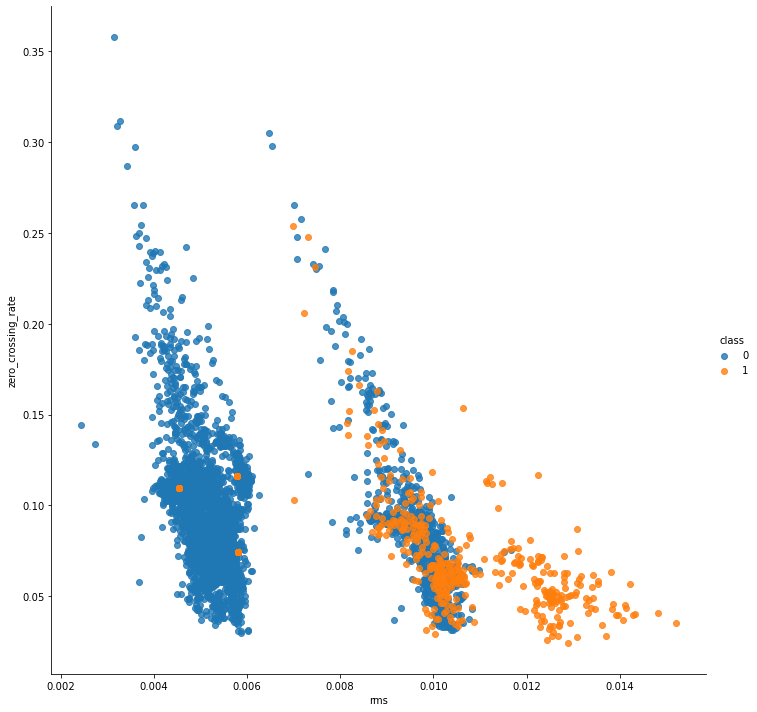

In [27]:
sns.lmplot(x='rms', y='zero_crossing_rate',  height=10, data=df,
           fit_reg=False, hue='class')

#### After

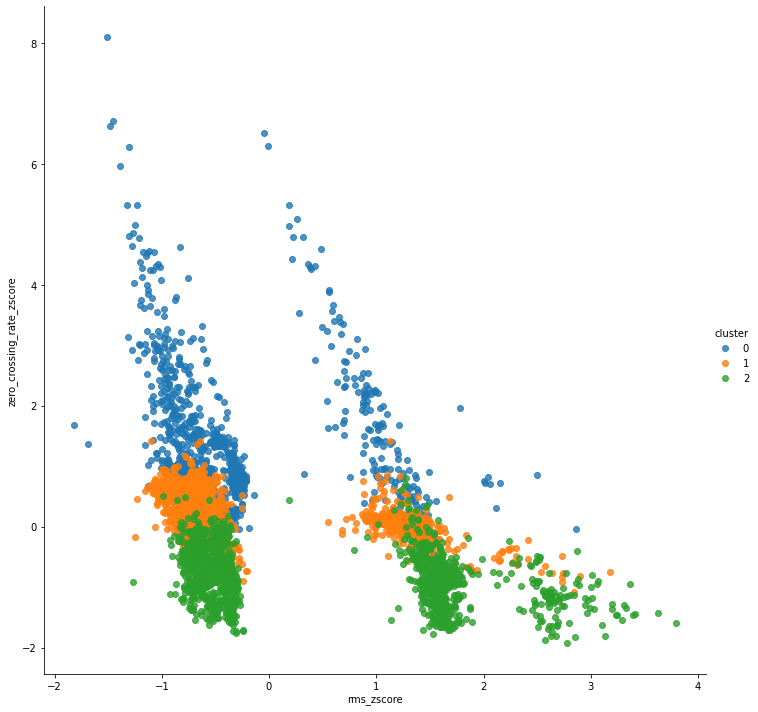

In [26]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')

#### Data insights: 
* Cluster 0 is for normal audio
* Cluster 1 is for transitory audio
* Cluster 2 is for abnormal audio